## Importing Libraries

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split

## Preparing Dataset

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Brain_Tumor_Project/brain_tumor_dataset"
SEED = 40
YES_DATASET = DATASET_PATH + "/yes"
NO_DATASET = DATASET_PATH + "/no"

In [ ]:
print(f"Number of images with Brain Tumor: {len(os.listdir(YES_DATASET))}")
print(f"Number of images without Brain Tumor: {len(os.listdir(NO_DATASET))}")

Number of images with Brain Tumor: 170
Number of images without Brain Tumor: 98


In [ ]:
def load_imgs(folder_name):
  imgs = []
  target = 0
  labels = []
  for i in os.listdir(folder_name):
      subdir = os.path.join(folder_name, i)
      for j in os.listdir(subdir):
          img_path = os.path.join(subdir, j)
          try:
              img = cv2.imread(img_path)
              img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
              img = cv2.resize(img, (128,128))
              imgs.append(img)
              labels.append(target)
          except:
              print(f"Could not read and resize image {img_path}" )
      target += 1
  
  imgs = np.array(imgs)
  labels = np.array(labels)
  
  return imgs, labels

In [ ]:
images, labels = load_imgs(DATASET_PATH)
print(images.shape, labels.shape)

(268, 128, 128) (268,)


## Visualisation Data


In [ ]:
def plot_images():
  plt.figure(figsize=(22,8))
  for i in range(10):
    axs = plt.subplot(2,5, i+1)
    plt.imshow(images[i], cmap='gray')
    axs.set_xlabel(labels[i])
  plt.show()


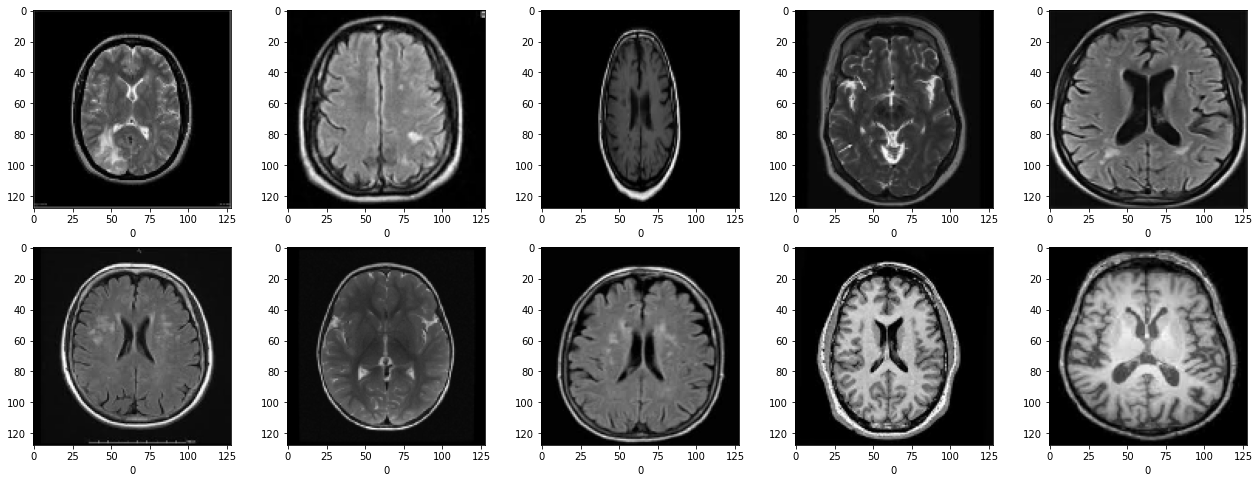

In [ ]:
plot_images()

# Data Normalisation


In [ ]:
norm_images = images / 255. 
norm_images = np.expand_dims(norm_images, axis=3)
norm_images.shape

(268, 128, 128, 1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(norm_images, labels, random_state=12)

In [ ]:
tf.random.set_seed(SEED)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(128, 128, 1)),
        tf.keras.layers.Conv2D(64, 5, activation="relu"),
        tf.keras.layers.MaxPooling2D(3),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(2),
     
        tf.keras.layers.Flatten(),
     
        tf.keras.layers.Dense(200 , activation = 'relu'),
        tf.keras.layers.Dense(100 , activation = 'relu'),
        tf.keras.layers.Dense(100 , activation = 'relu'),
        tf.keras.layers.Dense(1, activation='softmax'),
    ]
)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
xtrain.shape

(201, 128, 128, 1)

In [ ]:
history = model.fit(xtrain, ytrain, epochs=50)

Epoch 1/50
7/7 [==============================] - 10s 48ms/step - loss: 7.3615 - accuracy: 0.6468
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6619 - accuracy: 0.6468
Epoch 3/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6574 - accuracy: 0.6468
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6345 - accuracy: 0.6468
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6656 - accuracy: 0.6468
Epoch 6/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6484 - accuracy: 0.6468
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6611 - accuracy: 0.6468
Epoch 8/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6665 - accuracy: 0.6468
Epoch 9/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6581 - accuracy: 0.6468
Epoch 10/50
7/7 [==============================] - 0s 17ms/step - loss: 0.6511 - accuracy: 0.6468
Epoch 11/50
7/7 [===========

In [ ]:
model.evaluate(xtest, ytest)


3/3 [==============================] - 0s 59ms/step - loss: 0.6795 - accuracy: 0.5970


[0.6795279383659363, 0.5970149040222168]